# Mock Draft 2016

### Analyzing and modleing from the "expert" predictions

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame
from sklearn import feature_selection

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Data is compiled in a .csv file containing first round draft predictions from ESPN (Todd McShay and/or Mel Kiper), Bleacher Report, and Walter Football.

#### First, which "expert" has been the most accurate over the past 10 years?

In [6]:
with open("draft_mock_plus_stats.csv") as f:
    next(f)
    espn=0
    br=0
    wf=0
    total=0
    for line in f:
        if line.split(",")[6].strip() != "":
            total+=1
            if line.split(",")[2].strip() == line.split(",")[6].strip():
                espn+=1
            if line.split(",")[3].strip() == line.split(",")[6].strip():
                br+=1
            if line.split(",")[4].strip() == line.split(",")[6].strip():
                wf+=1
print "ESPN:\t\t", float(espn)/float(total)
print "BleacherReport:\t", float(br)/float(total)
print "WalterFootball:\t", float(wf)/float(total)

ESPN:		0.698039215686
BleacherReport:	0.635294117647
WalterFootball:	0.666666666667


In [7]:
pd.read_csv("draft_mock_plus_stats.csv").head()

,Team,Year,ESPN,BleacherReport,WalterFootball,OffensiveBias,IsOffense
0,Arizona Cardinals,2006,1.0,1.0,1.0,-11,1.0
1,Atlanta Falcons,2006,1.0,0.0,0.0,-10,0.0
2,Baltimore Ravens,2006,1.0,1.0,0.0,16,1.0
3,Buffalo Bills,2006,0.0,0.0,0.0,12,1.0
4,Carolina Panthers,2006,0.0,0.0,0.0,17,0.0


Load in the relevant data and omit teams with no first round draft pick from the model:

In [8]:
all_teams=pd.read_csv("draft_mock_plus_stats.csv")
picks=all_teams.dropna(subset=['IsOffense'])
print picks.head()

                Team  Year  ESPN  BleacherReport  WalterFootball  \
0  Arizona Cardinals  2006   1.0             1.0             1.0   
1    Atlanta Falcons  2006   1.0             0.0             0.0   
2   Baltimore Ravens  2006   1.0             1.0             0.0   
3      Buffalo Bills  2006   0.0             0.0             0.0   
4  Carolina Panthers  2006   0.0             0.0             0.0   

   OffensiveBias  IsOffense  
0            -11        1.0  
1            -10        0.0  
2             16        1.0  
3             12        1.0  
4             17        0.0  


In [9]:
df = pd.DataFrame(picks)
#print df
data_array = df.as_matrix()

In [10]:
exp_preds = data_array[:289, 2:5]
#print exp_preds
actual_pick = data_array[:289,6]
exp_preds = pd.DataFrame(exp_preds, columns=['ESPN', 'BeacherReport', 'WalterFootball'])

print exp_preds.shape
print actual_pick.shape

X_train, X_test, y_train, y_test = cross_validation.train_test_split(exp_preds, actual_pick, test_size=0.25, random_state=3)

X_train.shape, y_train.shape


(255, 3)
(255,)


((191, 3), (191,))

### Logistic Regression

In [11]:
logreg1 = LogisticRegression()
scores=cross_val_score(logreg1, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.61538462  0.84615385  0.61538462  0.80769231  0.65384615  0.73076923
  0.8         0.68        0.64        0.75      ]
0.713923076923


In [12]:
logreg_model = logreg1.fit(X_train, y_train.astype(int))
print logreg_model.score(X_train, y_train.astype(int))
print logreg_model.predict([[0,0,1]])
#print logreg_model.predict([[0,1,0]])
#print logreg_model.predict([[0,0,1]])
#print logreg_model.predict([[0,1,1]])

0.706806282723
[0]


### Random Forest


In [13]:
rf_model1 = RandomForestClassifier()
scores=cross_val_score(rf_model1, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
#rf_model = rf_model.fit(X_train, y_train)
print scores
print scores.mean()

[ 0.61538462  0.84615385  0.61538462  0.69230769  0.57692308  0.73076923
  0.8         0.64        0.64        0.75      ]
0.690692307692


### Support Vector Machine

In [14]:
svm_model1=svm.SVC()
scores=cross_val_score(svm_model1, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.65384615  0.80769231  0.61538462  0.73076923  0.57692308  0.65384615
  0.72        0.64        0.64        0.70833333]
0.674679487179


In [15]:
feature_selection.f_classif(exp_preds, np.array(actual_pick.astype(int)))

(array([ 46.23426093,  19.66577474,  30.79121339]),
 array([  7.51483288e-11,   1.37627386e-05,   7.23761167e-08]))

### K-Nearest Neighbors

In [16]:
k_range=range(1,51)
k_scores1=[]
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn1, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
    k_scores1.append(scores.mean())
print k_scores1
avg_kscore = sum(k_scores1)/len(k_scores1)


[0.61575641025641015, 0.61607692307692308, 0.59251282051282061, 0.63623076923076927, 0.62838461538461532, 0.68700000000000006, 0.64746153846153842, 0.67146153846153844, 0.66761538461538461, 0.68315384615384622, 0.66376923076923078, 0.69069230769230761, 0.70623076923076922, 0.69469230769230772, 0.68284615384615388, 0.68284615384615388, 0.69053846153846155, 0.68284615384615388, 0.69038461538461537, 0.67052564102564094, 0.67837179487179489, 0.70191025641025639, 0.69038461538461537, 0.69438461538461538, 0.68638461538461537, 0.69038461538461537, 0.68621794871794872, 0.69038461538461537, 0.69775641025641022, 0.69038461538461537, 0.69775641025641022, 0.69021794871794862, 0.68621794871794872, 0.68621794871794872, 0.68621794871794872, 0.69791025641025628, 0.69391025641025639, 0.69391025641025639, 0.68621794871794872, 0.69021794871794862, 0.68621794871794872, 0.68621794871794872, 0.69391025641025639, 0.68621794871794872, 0.68621794871794872, 0.68621794871794872, 0.68621794871794872, 0.6902179487

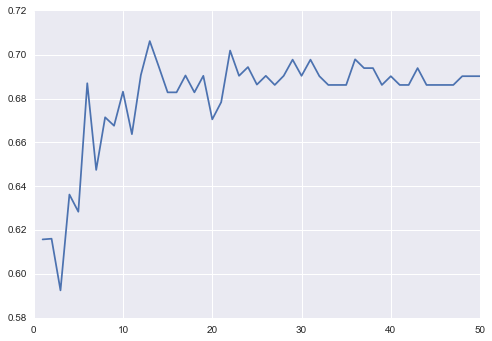

In [17]:
plt.plot(k_range, k_scores1)
plt.show()

#### Max accuracy at k=13

In [18]:


knn1 = KNeighborsClassifier(n_neighbors=13)
knn_model1 = knn1.fit(X_train, y_train.astype(int))
print knn_model1.score(X_train, y_train.astype(int))
print knn_model1.predict([[1,0,0]])


scores=cross_val_score(knn_model1, exp_preds, np.array(actual_pick.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

0.722513089005
[0]
[ 0.61538462  0.80769231  0.61538462  0.84615385  0.57692308  0.73076923
  0.76        0.68        0.68        0.75      ]
0.706230769231


In [19]:
feature_selection.f_classif(exp_preds, np.array(actual_pick.astype(int)))

(array([ 46.23426093,  19.66577474,  30.79121339]),
 array([  7.51483288e-11,   1.37627386e-05,   7.23761167e-08]))

## Now what happens to accuracy when we also consider stats from previous season?

In [20]:
exp_preds_and_stats = data_array[:289, 2:6]
actual_pick = data_array[:289,6]
exp_preds_and_stats = pd.DataFrame(exp_preds_and_stats, columns=['ESPN', 'BeacherReport', 'WalterFootball', 'OffensiveBias'])
#print exp_preds_and_stats

print exp_preds_and_stats.shape
print actual_pick.shape


X_train, X_test, y_train, y_test = cross_validation.train_test_split(exp_preds_and_stats, actual_pick, test_size=0.25, random_state=3)

X_train.shape, y_train.shape

(255, 4)
(255,)


((191, 4), (191,))

### Logistic Regression

In [21]:
X_scaled = preprocessing.scale(exp_preds_and_stats)
X_scaled_train = preprocessing.scale(exp_preds_and_stats)
Y_scaled = preprocessing.scale(actual_pick)
Y_scaled_train = preprocessing.scale(actual_pick)

#print X_scaled

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [22]:
logreg2 = LogisticRegression()
scores=cross_val_score(logreg2, X_scaled, np.array(Y_scaled.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.61538462  0.84615385  0.69230769  0.84615385  0.65384615  0.65384615
  0.8         0.56        0.64        0.625     ]
0.693269230769


In [23]:
logreg_model2 = logreg2.fit(X_scaled, Y_scaled.astype(int))
print logreg_model2.predict([[0,0,0,0]])


[0]


### Random Forest

In [24]:
rf_model2 = RandomForestClassifier()
scores=cross_val_score(rf_model2, X_scaled, np.array(Y_scaled.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.65384615  0.5         0.53846154  0.57692308  0.73076923  0.61538462
  0.6         0.64        0.52        0.66666667]
0.604205128205


### Support Vector Machine

In [25]:
svm_model2=svm.SVC()
scores=cross_val_score(svm_model2, X_scaled, np.array(Y_scaled.astype(int)), cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.65384615  0.76923077  0.61538462  0.69230769  0.57692308  0.69230769
  0.8         0.6         0.64        0.66666667]
0.670666666667


### K-Nearest Neighbors


In [26]:
k_range=range(1,51)
k_scores=[]
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn2, X_scaled, np.array(Y_scaled.astype(int)), cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores
avg_kscore = sum(k_scores)/len(k_scores)


[0.58803846153846151, 0.62742307692307686, 0.64230769230769225, 0.61555128205128207, 0.63879487179487171, 0.65512820512820513, 0.65898717948717944, 0.67867948717948712, 0.67098717948717934, 0.68605128205128207, 0.66282051282051291, 0.69821794871794873, 0.670679487179487, 0.68652564102564095, 0.6591410256410255, 0.67483333333333317, 0.67051282051282046, 0.68637179487179478, 0.67820512820512824, 0.67452564102564094, 0.6858974358974359, 0.68621794871794861, 0.67820512820512824, 0.68621794871794861, 0.68205128205128207, 0.69775641025641022, 0.68989743589743591, 0.68989743589743591, 0.67805128205128207, 0.68205128205128207, 0.68205128205128207, 0.67820512820512824, 0.69391025641025628, 0.68621794871794861, 0.68621794871794861, 0.69823076923076921, 0.69823076923076921, 0.69791025641025628, 0.69791025641025628, 0.69389743589743591, 0.6903717948717949, 0.69821794871794862, 0.69421794871794873, 0.69437179487179479, 0.69821794871794862, 0.70206410256410245, 0.69421794871794873, 0.698064102564102

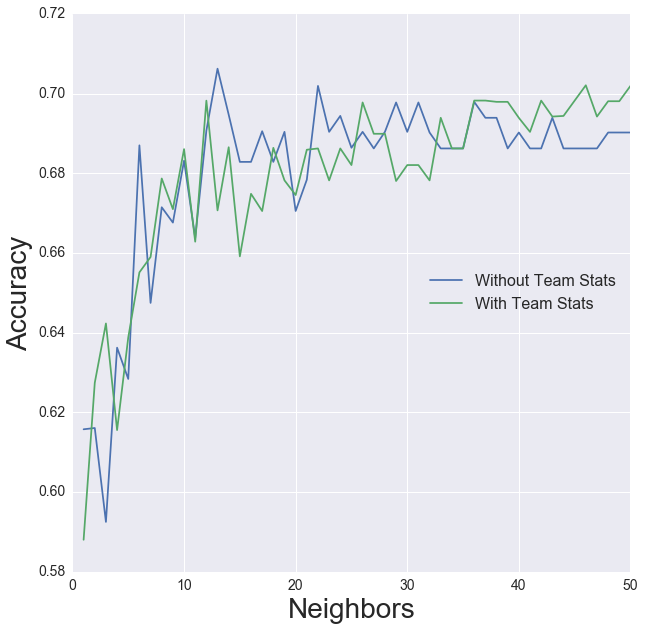

In [27]:
plt.figure(figsize=(10,10))
plt.plot(k_range, k_scores1, label='Without Team Stats')
plt.plot(k_range, k_scores, label='With Team Stats')
plt.xticks(fontsize=14)
plt.xlabel('Neighbors', fontsize='28')
plt.yticks(fontsize=14)
plt.ylabel('Accuracy', fontsize='28')
legend = plt.legend(loc='center right', prop={'size':16})
plt.show()

In [28]:
feature_selection.f_classif(X_scaled, np.array(Y_scaled.astype(int)))

(array([ 46.23426093,  19.66577474,  30.79121339,   6.23221372]),
 array([  7.51483288e-11,   1.37627386e-05,   7.23761167e-08,
          1.31816890e-02]))

## Now it's time for some predictions for the first round of the 2016 draft...

In [29]:
all_teams=pd.read_csv("draft_mock_plus_stats.csv")
drafting_teams=all_teams.dropna(subset=['ESPN'])
df = pd.DataFrame(drafting_teams)
draft_class=df.loc[df['Year'] == 2015]
data_array2015 = draft_class.as_matrix()
test_set = data_array2015[:, 2:6]
print test_set.shape

(31, 4)


#### First, predicting the draft with 2015 team stats included

In [30]:
for n in range(0,31):   
    if logreg_model2.predict(test_set[n].reshape(1,-1)) == 1:
        print data_array2015[n,0], "\t\t", "Offense"
         
    if logreg_model2.predict(test_set[n].reshape(1,-1)) == 0:
        print data_array2015[n,0], "\t\t", "Defense"

Arizona Cardinals 		Defense
Atlanta Falcons 		Defense
Baltimore Ravens 		Offense
Buffalo Bills 		Defense
Carolina Panthers 		Offense
Chicago Bears 		Offense
Cincinnati Bengals 		Offense
Cleveland Browns 		Defense
Dallas Cowboys 		Offense
Denver Broncos 		Offense
Detroit Lions 		Offense
Green Bay Packers 		Offense
Houston Texans 		Offense
Indianapolis Colts 		Offense
Jacksonville Jaguars 		Defense
Kansas City Chiefs 		Offense
Miami Dolphins 		Offense
Minnesota Vikings 		Offense
New Orleans Saints 		Defense
New York Giants 		Defense
New York Jets 		Offense
Oakland Raiders 		Offense
Philadelphia Eagles 		Defense
Pittsburgh Steelers 		Defense
San Diego Chargers 		Defense
San Francisco 49ers 		Offense
Seattle Seahawks 		Offense
St. Louis Rams 		Offense
Tampa Bay Buccaneers 		Defense
Tennessee Titans 		Offense
Washington Redskins 		Defense


#### Now without 2015 team stats (only expert predictions)

In [34]:
all_teams=pd.read_csv("draft_mock_plus_stats.csv")
drafting_teams=all_teams.dropna(subset=['ESPN'])
df = pd.DataFrame(drafting_teams)
draft_class=df.loc[df['Year'] == 2015]

data_array2015 = draft_class.as_matrix()
test_set_no_stats = data_array2015[:, 2:5]
print test_set_no_stats.shape

(31, 3)


In [37]:
#print test_set_no_stats
for n in range(0,31):   
    if knn_model1.predict(test_set_no_stats[n].reshape(1,-1)) == 1:
        print data_array2015[n, 0], "\t\t", "Offense"
    if knn_model1.predict(test_set_no_stats[n].reshape(1,-1)) == 0:
        print data_array2015[n, 0], "\t\t", "Defense"


Arizona Cardinals 		Offense
Atlanta Falcons 		Defense
Baltimore Ravens 		Defense
Buffalo Bills 		Defense
Carolina Panthers 		Defense
Chicago Bears 		Offense
Cincinnati Bengals 		Defense
Cleveland Browns 		Defense
Dallas Cowboys 		Defense
Denver Broncos 		Defense
Detroit Lions 		Defense
Green Bay Packers 		Defense
Houston Texans 		Offense
Indianapolis Colts 		Defense
Jacksonville Jaguars 		Defense
Kansas City Chiefs 		Offense
Miami Dolphins 		Defense
Minnesota Vikings 		Defense
New Orleans Saints 		Defense
New York Giants 		Defense
New York Jets 		Defense
Oakland Raiders 		Defense
Philadelphia Eagles 		Offense
Pittsburgh Steelers 		Defense
San Diego Chargers 		Offense
San Francisco 49ers 		Defense
Seattle Seahawks 		Offense
St. Louis Rams 		Offense
Tampa Bay Buccaneers 		Defense
Tennessee Titans 		Defense
Washington Redskins 		Defense
